In [80]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

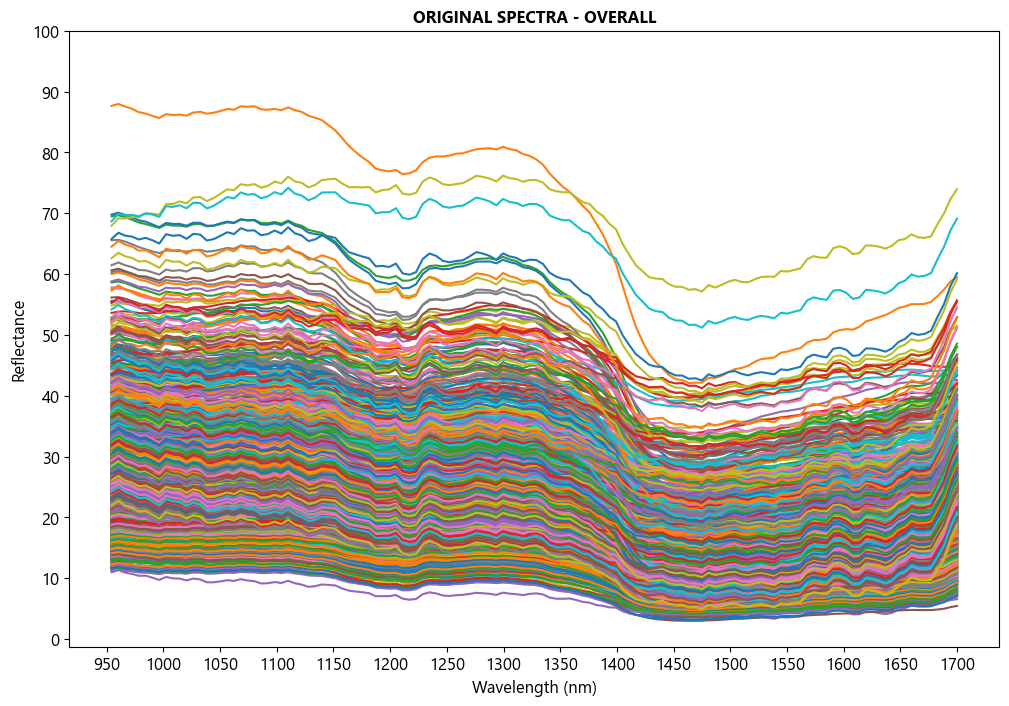

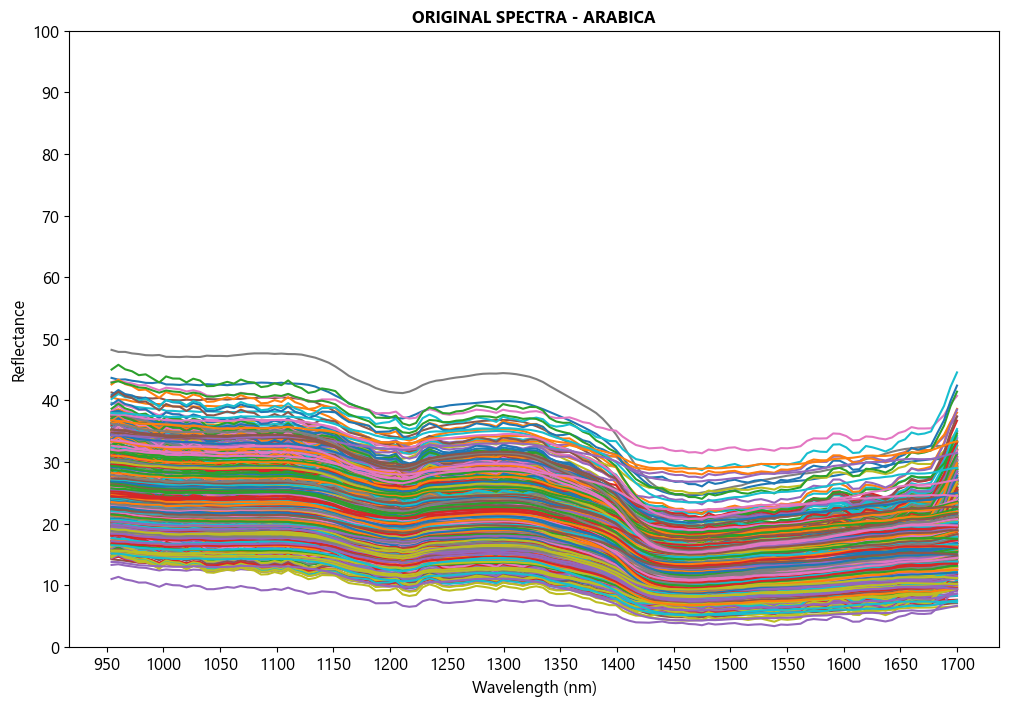

[]

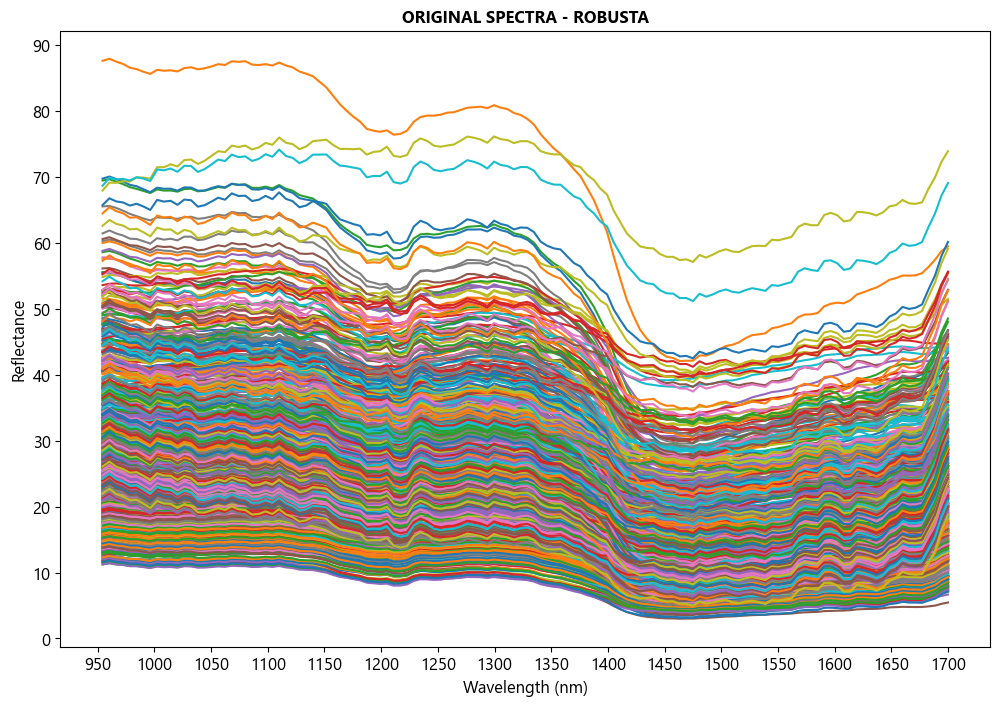

In [108]:
# 1 - Ubah path
# 2 - Ubah rentang values data
# 3 - Ubah xticks

path = 'dataset/nir_coffee_bean.csv'
data = pd.read_csv(path)
# --- Labels
label = data.values[:,0].astype('uint8')
# --- Spectral data; transform from reflectance to absorbance
spectra_raw = data.values[:,2:].astype('float32')
spectra_arabica = data.values[:749,2:].astype('float32')
spectra_robusta = data.values[750:,2:].astype('float32')
# Target names of data
target_names = {
    1: 'JA',
    2: 'JR',
}
# Wavelengths
cols = list(data.columns.values.tolist())
wls = [float(x) for x in cols[2:]]

plt.figure(figsize=(12, 8))
plt.plot(wls, spectra_raw.T)
#plt.xticks(np.arange(400,1050, step=50), fontsize=12, fontname="Segoe UI")
plt.xticks(np.arange(950,1750, step=50), fontsize=12, fontname="Segoe UI")
plt.yticks(np.arange(0,110, step=10), fontsize=12, fontname="Segoe UI")
plt.title('ORIGINAL SPECTRA - OVERALL', fontweight='bold', fontsize=12, fontname="Segoe UI")
plt.ylabel('Reflectance', fontsize=12, fontname="Segoe UI")
plt.xlabel('Wavelength (nm)', fontsize=12, fontname="Segoe UI")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(wls, spectra_arabica.T)
#plt.xticks(np.arange(400,1050, step=50), fontsize=12, fontname="Segoe UI")
plt.xticks(np.arange(950,1750, step=50), fontsize=12, fontname="Segoe UI")
plt.yticks(np.arange(0,110, step=10), fontsize=12, fontname="Segoe UI")
plt.title('ORIGINAL SPECTRA - ARABICA', fontweight='bold', fontsize=12, fontname="Segoe UI")
plt.ylabel('Reflectance', fontsize=12, fontname="Segoe UI")
plt.xlabel('Wavelength (nm)', fontsize=12, fontname="Segoe UI")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(wls, spectra_robusta.T)
#plt.xticks(np.arange(400,1050, step=50), fontsize=12, fontname="Segoe UI")
plt.xticks(np.arange(950,17560, step=50), fontsize=12, fontname="Segoe UI")
plt.yticks(np.arange(0,110, step=10), fontsize=12, fontname="Segoe UI")
plt.title('ORIGINAL SPECTRA - ROBUSTA', fontweight='bold', fontsize=12, fontname="Segoe UI")
plt.ylabel('Reflectance', fontsize=12, fontname="Segoe UI")
plt.xlabel('Wavelength (nm)', fontsize=12, fontname="Segoe UI")
plt.plot()


[]

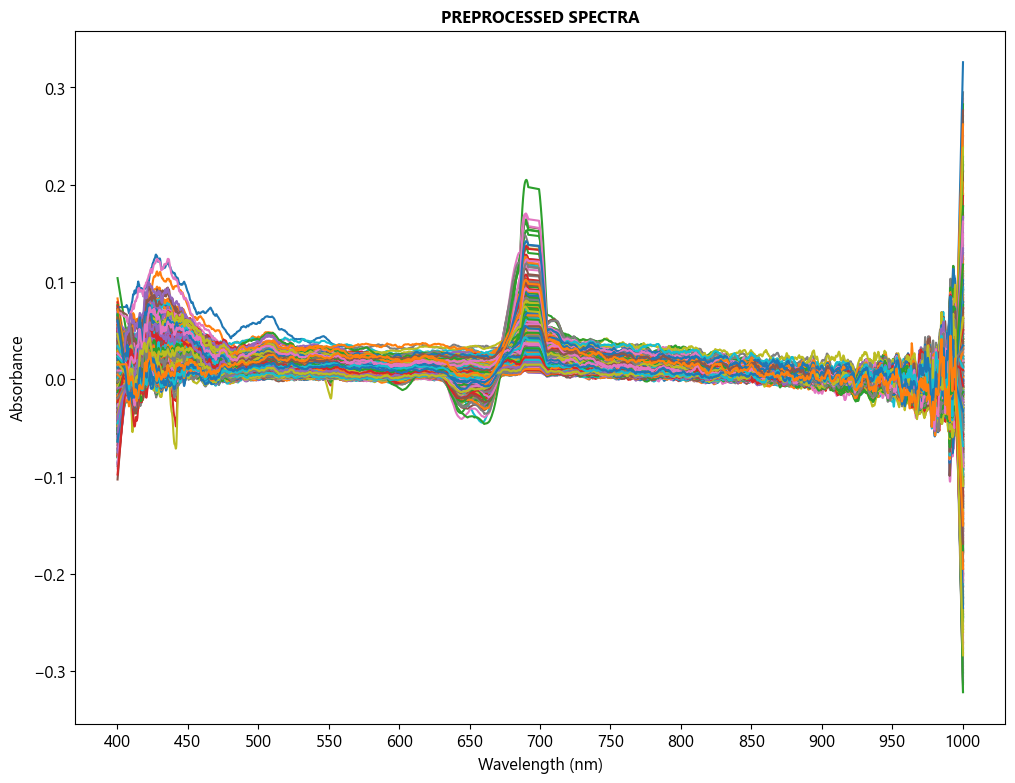

In [97]:
# SAVITZKY-GOLAY DERIVATIVE/FILTER
def SG_derivative(input_data, window_size, polyorder, derivative):
    SG_filter = savgol_filter(input_data,
                              window_length=window_size,
                              polyorder=polyorder,
                              deriv=derivative,
                              delta=1.0,
                              axis=-1,
                              mode='interp', #'nearest'
                              cval=0.0)
    return SG_filter

# --- Preprocessed spectra
spectra_sgd = SG_derivative(spectra_raw, window_size=60, polyorder=2, derivative=1)

plt.figure(figsize=(12, 9))
plt.plot(wls, spectra_sgd.T)
plt.xticks(np.arange(400,1050, step=50), fontsize=12, fontname="Segoe UI")
plt.yticks(fontsize=12, fontname="Segoe UI")
plt.title('PREPROCESSED SPECTRA', fontweight='bold', fontsize=12, fontname="Segoe UI")
plt.ylabel('Absorbance', fontsize=12, fontname="Segoe UI")
plt.xlabel('Wavelength (nm)', fontsize=12, fontname="Segoe UI")
plt.plot()


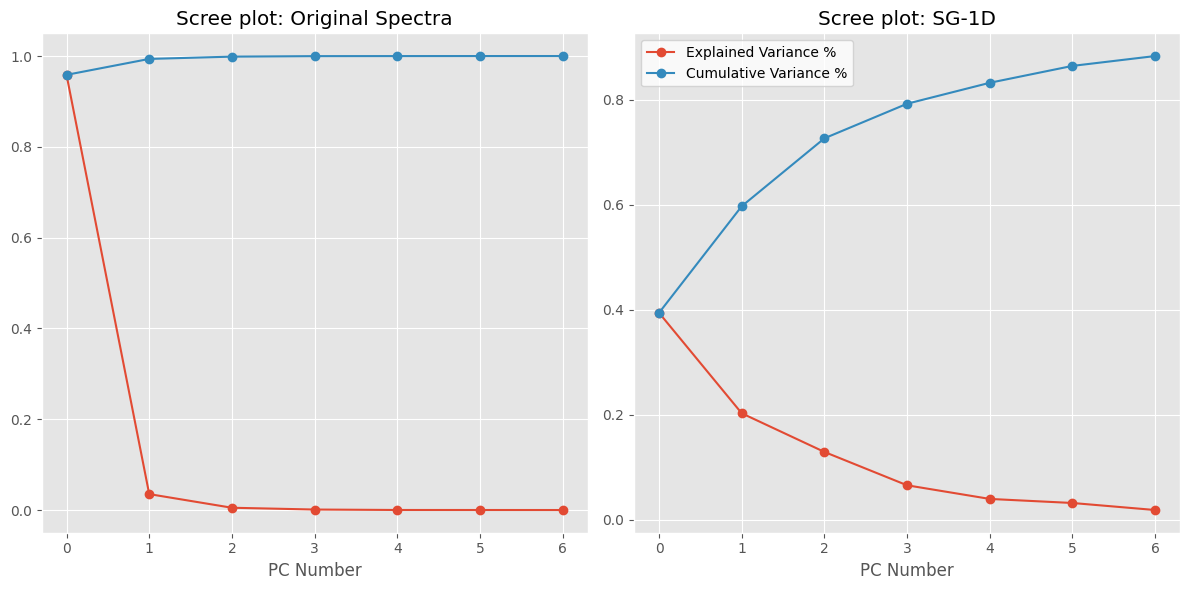

Explained variation per principal component: 95.85%
Explained variation per principal component: 3.51%
Explained variation per principal component: 0.5%
Explained variation per principal component: 0.11%
Explained variation per principal component: 0.01%
Explained variation per principal component: 0.01%
Explained variation per principal component: 0.0%


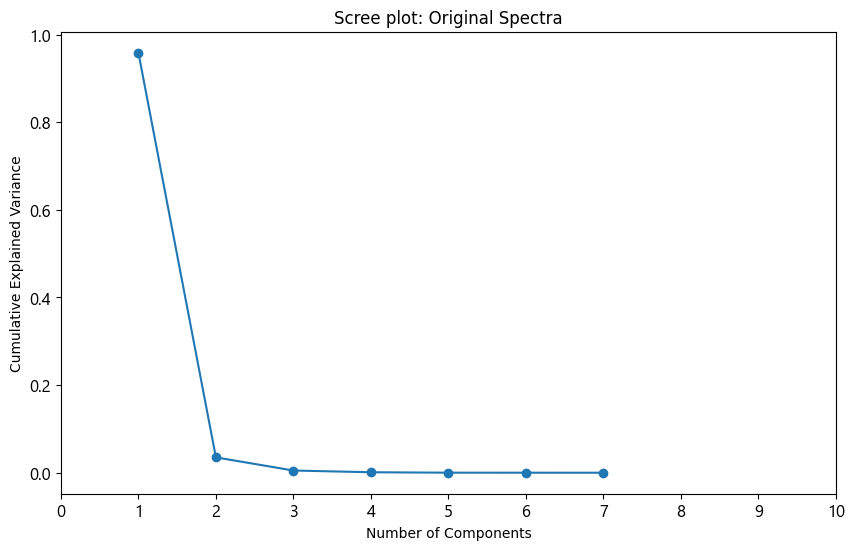

Explained variation per principal component: 39.44%
Explained variation per principal component: 20.3%
Explained variation per principal component: 12.94%
Explained variation per principal component: 6.59%
Explained variation per principal component: 3.99%
Explained variation per principal component: 3.22%
Explained variation per principal component: 1.88%


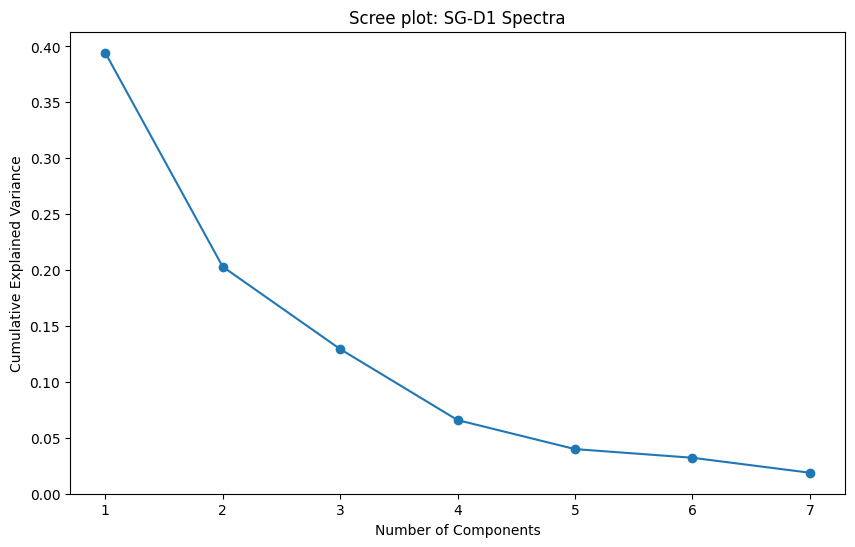

In [110]:
# NUMBER OF PRINCIPLE COMPONENTS

pca = PCA(n_components=7)
# Fit the spectral data and extract the explained variance ratio
X1 = pca.fit(spectra_raw)
expl_var_1 = X1.explained_variance_ratio_

X2 = pca.fit(spectra_sgd)
expl_var_2 = X2.explained_variance_ratio_

# PLOT DATA
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    fig.set_tight_layout(True)

    ax1.plot(expl_var_1, '-o', label='Explained Variance %')
    ax1.plot(np.cumsum(expl_var_1), '-o', label = 'Cumulative Variance %')
    ax1.set_xlabel('PC Number')
    ax1.set_title('Scree plot: Original Spectra')

    ax2.plot(expl_var_2, '-o', label='Explained Variance %')
    ax2.plot(np.cumsum(expl_var_2), '-o', label = 'Cumulative Variance %')
    ax2.set_xlabel('PC Number')
    ax2.set_title('Scree plot: SG-1D')
plt.legend()
plt.show()

# SCREE PLOT
x = np.arange(1, 8)
for v in expl_var_1:
    print('Explained variation per principal component: {}%'.format(round(v*100,2)))
plt.subplots(figsize=(10,6))
plt.plot(x, expl_var_1, '-o')
#for index in range(len(x)):
#  ax.text(x[index], percentage_total_var_explained[index], percentage_total_var_explained[index], size=10)
plt.title('Scree plot: Original Spectra')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(0, 11, step=1), fontsize=12, fontname="Segoe UI")
plt.yticks(fontsize=12, fontname="Segoe UI")
plt.show()

# SCREE PLOT
x = np.arange(1, 8)
for v in expl_var_2:
    print('Explained variation per principal component: {}%'.format(round(v*100,2)))
plt.subplots(figsize=(10,6))
plt.plot(x, expl_var_2, '-o')
plt.title('Scree plot: SG-D1 Spectra')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

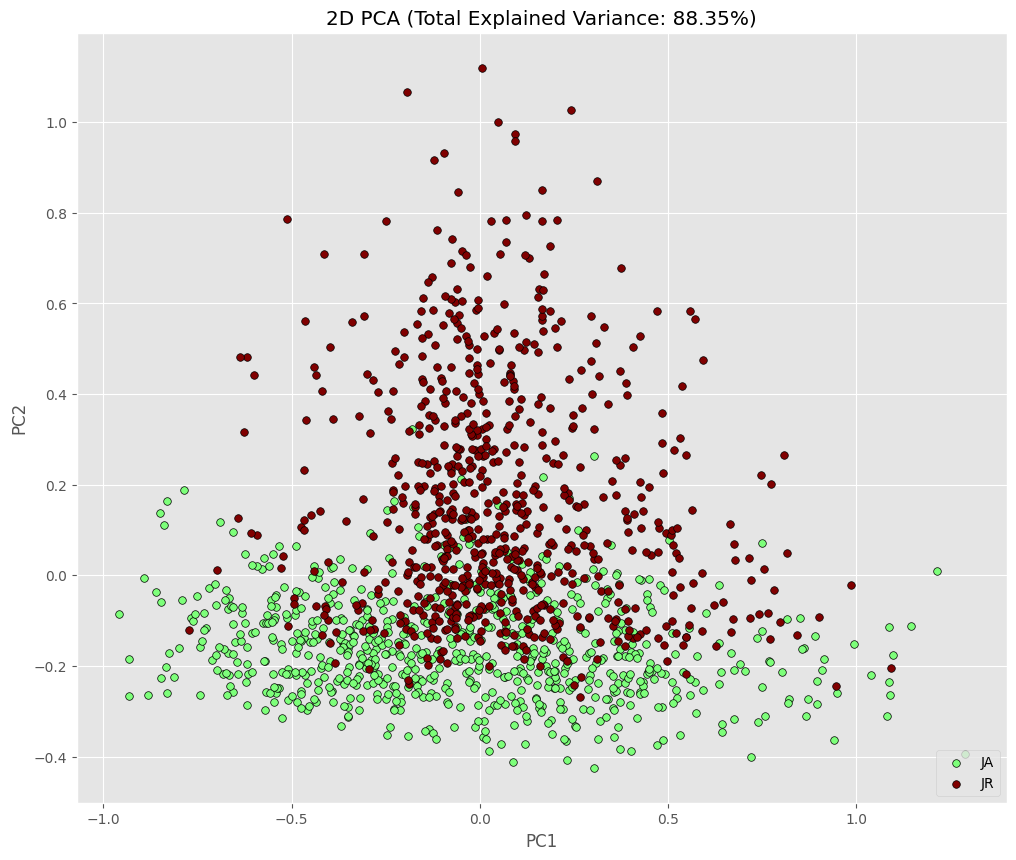

In [101]:
# PCA SCATTER PLOT
def pc_scores(input_spectra, num_comps, explained_variance):
    pca1 = PCA(n_components=num_comps)

    # Transform on the scaled features
    Xcomps = pca1.fit_transform(input_spectra)
    pc_list = ['PC'+ str(i) for i in list(range(1, num_comps+1))]
    scores_df =pd.DataFrame.from_dict(dict(zip(pc_list, Xcomps)))
    #print(scores_df)

    # Define the labels
    label_name = ['JA', 'JR']

    PCs_var = explained_variance*100
    total_var = explained_variance.sum()*100

    # 2D Scatter Plot
    unique = list(set(label))
    colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
    with plt.style.context(('ggplot')):
        plt.subplots(figsize=(12,10))
        for i, u in enumerate(unique):
            col = np.expand_dims(np.array(colors[i]), axis=0)
            pc1 = [Xcomps[j,0] for j in range(len(Xcomps[:,0])) if label[j] == u]    # PC1
            pc2 = [Xcomps[j,1] for j in range(len(Xcomps[:,1])) if label[j] == u]    # PC2
            pc3 = [Xcomps[j,2] for j in range(len(Xcomps[:,2])) if label[j] == u]    # PC3
            pc4 = [Xcomps[j,3] for j in range(len(Xcomps[:,3])) if label[j] == u]    # PC4
            pc5 = [Xcomps[j,4] for j in range(len(Xcomps[:,4])) if label[j] == u]    # PC5
            pc6 = [Xcomps[j,5] for j in range(len(Xcomps[:,5])) if label[j] == u]    # PC6
            pc7 = [Xcomps[j,6] for j in range(len(Xcomps[:,6])) if label[j] == u]    # PC7
            plt.scatter(pc1, pc2, c=col, s=30, edgecolors='k', label=str(u))
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend(label_name, loc = 'lower right')
        plt.title('2D PCA' + f' (Total Explained Variance: {total_var:.2f}%)')
        plt.show()

    # 2D PCA Scatter Plot
    fig = px.scatter(Xcomps, x=0, y=1, color=label,
                     labels={'0':'PC1 ('+str(round(PCs_var[0],2))+'%)',
                             '1':'PC2 ('+str(round(PCs_var[1],2))+'%)',
                             '2':'PC3 ('+str(round(PCs_var[2],2))+'%)',
                             '3':'PC4 ('+str(round(PCs_var[3],2))+'%)',
                             '4':'PC5 ('+str(round(PCs_var[4],2))+'%)',
                             '5':'PC6 ('+str(round(PCs_var[5],2))+'%)',
                             '6':'PC7 ('+str(round(PCs_var[6],2))+'%)'})
    fig.update_traces(marker=dict(size=8,line=dict(width=1, color='DarkSlateGrey')), selector=dict(mode='markers'))
    fig.update_layout(
        autosize=False, width=800, height=700,
        margin=dict(l=50, r=50, b=50, t=50, pad=4),
        paper_bgcolor="white",
    )
    fig.show()

    # 3D PCA Plot

    fig = px.scatter_3d(Xcomps, x=0, y=1, z=3, color=label,
                        title=f'Total Explained Variance: {total_var:.2f}%',
                        labels={'0':'PC1 ('+str(round(PCs_var[0],2))+'%)',
                                '1':'PC2 ('+str(round(PCs_var[1],2))+'%)',
                                '2':'PC3 ('+str(round(PCs_var[2],2))+'%)',
                                '3':'PC4 ('+str(round(PCs_var[3],2))+'%)',
                                '4':'PC5 ('+str(round(PCs_var[4],2))+'%)',
                                '5':'PC6 ('+str(round(PCs_var[5],2))+'%)',
                                '6':'PC7 ('+str(round(PCs_var[6],2))+'%)'})

    fig.update_traces(marker=dict(size=7,line=dict(width=1, color='DarkSlateGrey')), selector=dict(mode='markers'))
    fig.update_layout(
        autosize=False, width=800, height=700,
        margin=dict(l=50, r=50, b=50, t=50, pad=4),
        paper_bgcolor='white',
    )
    fig.show()
pcs = pc_scores(spectra_sgd,7, expl_var_2)